In [1]:
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.externals import joblib
from sklearn.feature_selection import SelectKBest #feature selection best features
from sklearn.feature_selection import chi2 # clase chi-cuadrado 
import numpy as np

In [2]:
df = pd.read_csv('/data/UMG/ProDeGree/Grad I/ML/Youtube01-Psy.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
COMMENT_ID    350 non-null object
AUTHOR        350 non-null object
DATE          350 non-null object
CONTENT       350 non-null object
CLASS         350 non-null int64
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


In [8]:
df[['CONTENT']] # head muestra solo las primeras 5 lineas del dataset

,CONTENT
0,"Huh, anyway check out this you[tube] channel: ..."
1,Hey guys check out my new channel and our firs...
2,just for test I have to say murdev.com
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿
4,watch?v=vtaRGgvGtWQ Check this out .﻿
5,"Hey, check out my new website!! This site is a..."
6,Subscribe to my channel ﻿
7,i turned it on mute as soon is i came on i jus...
8,You should check my channel for Funny VIDEOS!!﻿
9,and u should.d check my channel and tell me wh...


In [10]:
df.count()


COMMENT_ID    350
AUTHOR        350
DATE          350
CONTENT       350
CLASS         350
dtype: int64

In [39]:
df_data = df[['CONTENT', 'CLASS']]
#df_data

## Usando  selectKBest 

In [116]:
X = df.iloc[:,0:4]
y = df.iloc[:,-1]

#codificar la columna content de categorica a numerica con dicVectroizer
from sklearn.feature_extraction import DictVectorizer
X_dict = X.to_dict(orient='records') # conviertiendo de dataFrame en diccionario

#print(X_dict)
X_DV = DictVectorizer(sparse=False)

X_encoded = X_DV.fit_transform(X_dict)

support = SelectKBest(score_func=chi2, k=10)
fit = support.fit(X_encoded, y)

features = fit.transform(X_encoded)
np.set_printoptions(precision=3) 

print(features)
#Summarize selected features 


#punteo_df = pd.DataFrame(fit.scores_)
#columna_df = pd.DataFrame(X.columns)

#punteo_features = pd.concat([columna_df, punteo_df], axis= 1)
#punteo_features.columns = ['variable', 'punteo']

#punteo_features
#print(punteo_features.nlargest(10, 'punteo'))

#X_DV.restrict(support.get_support())

#DictVectorizer(dtype=..., separator='=', sort=True, sparse=True)
#fit.scores_

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


## Usando  Feature importance (extra Tree classifier)

In [103]:
import seaborn as sns
data = df.to_dict(orient='records')
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

AttributeError: 'list' object has no attribute 'corr'

In [104]:
X_dict = pd.get_dummies(X, prefix_sep='_', drop_first=True)
X_dict

,COMMENT_ID_LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,COMMENT_ID_LZQPQhLyRh9EXArr4ZnVcDonSbvSMHKYOT24e_qR6fE,COMMENT_ID_LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,COMMENT_ID_LZQPQhLyRh9U7Lv_DKpJ7lawpBCotxfgHzBy93Tk028,COMMENT_ID_LZQPQhLyRh9vw01Xvvw5yWzZEUOPG1hSgRMHep55-Yw,COMMENT_ID_LZQPQhLyRh9y57URF7qpZRk3MVAJNLNhhZga_5YWBU8,COMMENT_ID_LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,COMMENT_ID_LZQPQhLyRh_hbykd_Xw4oDROJbJTFrs-UbSB2xk8gRk,COMMENT_ID_z120grixiomvyvbga04cfl24csz5jf4zzuc0k,COMMENT_ID_z120wncjevujt1aju04cff4b1yfcvhrbpis,...,CONTENT_this jap is such a piece of shit. he is such a worthless fish head. i dont know how any one likes this dumb untanlted gook. this isnt even fucken music. this is so fucking sad that this is even such thing. people are so fucked up.﻿,CONTENT_thumbs up if u checked this video to see hw views it got﻿,CONTENT_watch?v=vtaRGgvGtWQ Check this out .﻿,CONTENT_when is this gonna hit 2 billion?﻿,CONTENT_why I dont see any comments but mine?:/﻿,CONTENT_why are they 5million comments when there is only 279.898 youtube Users. 5million fake account or PSY hacked youtube﻿,CONTENT_www.marketglory.com/strategygame/lordviperas﻿,CONTENT_▬▬▬▬▬▬▬▬▬▬ஜ۩۞۩ஜ▬▬▬▬▬▬▬▬ ＤＡＭＮ ＴＨＩＳ ＣＯＭＭＥＮＴ ＩＳ ＦＡＮＣY ▬▬▬▬▬▬▬▬▬▬ஜ۩۞۩ஜ▬▬▬▬▬▬▬▬﻿,CONTENT_❤️ ❤️ ❤️ ❤️ ❤️❤️❤️❤️﻿,CONTENT_😫😓😏😪😔😖😌😭😎😚😘😙😗😋😝😜😛😍😒😞😷😶😵😳😲😱😟😰😩😨😧😦😥😤😣😮😴😢😡😠😬😕😑😐😯😉😈😇😆😅😄😃😂😁😀😊☺ every single types of face on earth﻿
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [207]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder# instantiate labelencoder object

ds = pd.read_csv('/data/UMG/ProDeGree/Grad I/ML/Chronic_Kidney_Disease/chronic_kidney_disease.csv', header=None, 
 names=['age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc','htn','dm','cad','appet','pe','ane','class'])
dsq = ds.replace(to_replace ="?", value = 'NaN') 

X1 = ds.iloc[:,0:24]
y1 = ds.iloc[:,-1]

X_dict = X1.to_dict(orient='records')

X_DV1 = DictVectorizer(sparse=False)

X_encoded1 = X_DV1.fit_transform(X_dict)
#print(X_encoded1)
le = LabelEncoder()

categorical_feature_mask = X1.dtypes==object # filter categorical columns using mask and turn it into a list
categorical_cols = X1.columns[categorical_feature_mask].tolist()
X1[categorical_cols] = X1[categorical_cols].apply(lambda col: le.fit_transform(col))
#categorical_cols
#support = SelectKBest(score_func=chi2, k=10)
#fit = support.fit(X_encoded1, y1)

#features = fit.transform(X_encoded1)
#np.set_printoptions(precision=3) 

#print(features[0:5,:])
#X1[categorical_cols]
dsq

/home/itsky/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,60,90,1.015,3,0,NaN,NaN,notpresent,notpresent,74,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68,70,1.010,0,0,NaN,normal,notpresent,notpresent,100,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,24,NaN,1.015,2,4,normal,abnormal,notpresent,notpresent,410,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,52,100,1.015,3,0,normal,abnormal,present,notpresent,138,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [2]:
import numpy as np                 
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder       # instantiate labelencoder object
from sklearn.feature_selection import SelectKBest   #feature selection best features
from sklearn.feature_selection import chi2         # clase chi-cuadrado 
from sklearn.feature_selection import f_classif    #clase f_clasificador ANOVA
from sklearn.ensemble import RandomForestClassifier

ds = pd.read_csv('/data/UMG/ProDeGree/Grad I/ML/car-data.csv') #-------------importando dataset
ds.info()   #--------------------------------informacion general del set
print(ds.isnull().sum()) #------------------Despliega las columnas con datos nulos 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null int64
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-n

In [318]:
#---------------------------------Manejando los valores nulos o vacios por EL VALOR MAS FRECUENTE.--
ds['normalized-losses'] = ds['normalized-losses'].fillna(ds['normalized-losses'].value_counts().index[0])
ds['num-of-doors'] = ds['num-of-doors'].fillna(ds['num-of-doors'].value_counts().index[0])
ds['bore']= ds['bore'].fillna(ds['bore'].value_counts().index[0])
ds['stroke'] = ds['stroke'].fillna(ds['stroke'].value_counts().index[0])
ds['horsepower'] = ds['horsepower'].fillna(ds['horsepower'].value_counts().index[0]) 
ds['peak-rpm'] = ds['peak-rpm'].fillna(ds['peak-rpm'].value_counts().index[0]) 
ds['price']= ds['price'].fillna(ds['price'].value_counts().index[0])

#----------------verificando la existencia de valore nulos 
null_columns=ds.columns[ds.isnull().any()]
#print(ds[ds.isnull()][null_columns])
#print(ds.isnull().any().any())
print(ds.isnull().sum())

# --------------------------SEPARANDO LAS COLUMNAS CATEGORICAS /NUMERIC /FLOAT -----------
categorical_cols = ds.columns[ds.dtypes==object].tolist()
numerical_cols = ds.columns[ds.dtypes==int].tolist()
float_cols = ds.columns[ds.dtypes== float].tolist()
print(categorical_cols)
print(numerical_cols) 
print(float_cols)



symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64
['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system']
['symboling', 'curb-weight', 'num-of-cylinders', 'engine-size', 'city-mpg', 'highway-mpg']
['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'price']


In [320]:
#--------------------VERIFIANDO LAS CLASES DE CADA COLUMNA
print(ds['fuel-type'].value_counts())

#........................SEPARANDO X CON Y
drop_col=['price'] # TARGET 
X = ds.drop(drop_col, axis = 1) # definiendo set features X
y = ds['price']  #definiendo target y Vector
#X1 = ds.iloc[:,0:25]
#y1 = ds.iloc[:,-1]


gas       185
diesel     20
Name: fuel-type, dtype: int64


In [336]:
#-------------------- DictVectorized Encoder
from sklearn.feature_extraction import DictVectorizer
X_dict = X.to_dict(orient='records')
#print(X1['symboling'].value_counts())
X_DV1 = DictVectorizer(sparse=False)
X_encoded = X_DV1.fit_transform(X_dict)
print(X_encoded)

#----------------------Seleccionando features con >><< f_classif >>
support = SelectKBest(f_classif, k='all').fit(X_encoded, y)

X_DV1.restrict(support.get_support()) 
DictVectorizer(dtype=..., separator='=', sort=True, sparse=True)
print(X_DV1.get_feature_names())

[[  1.    0.    1.  ...   3.   88.6  64.1]
 [  1.    0.    1.  ...   3.   88.6  64.1]
 [  1.    0.    0.  ...   1.   94.5  65.5]
 ...
 [  1.    0.    0.  ...  -1.  109.1  68.9]
 [  0.    1.    0.  ...  -1.  109.1  68.9]
 [  0.    1.    0.  ...  -1.  109.1  68.9]]
['aspiration=std', 'aspiration=turbo', 'body-style=convertible', 'body-style=hardtop', 'body-style=hatchback', 'body-style=sedan', 'body-style=wagon', 'bore', 'city-mpg', 'compression-ratio', 'curb-weight', 'drive-wheels=4wd', 'drive-wheels=fwd', 'drive-wheels=rwd', 'engine-location=front', 'engine-location=rear', 'engine-size', 'engine-type=dohc', 'engine-type=dohcv', 'engine-type=l', 'engine-type=ohc', 'engine-type=ohcf', 'engine-type=ohcv', 'engine-type=rotor', 'fuel-system=1bbl', 'fuel-system=2bbl', 'fuel-system=4bbl', 'fuel-system=idi', 'fuel-system=mfi', 'fuel-system=mpfi', 'fuel-system=spdi', 'fuel-system=spfi', 'fuel-type=diesel', 'fuel-type=gas', 'height', 'highway-mpg', 'horsepower', 'length', 'make=alfa-romero', 'ma

/home/itsky/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


(17, 17)


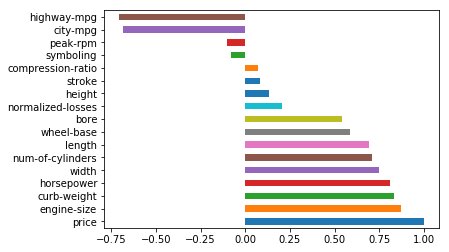

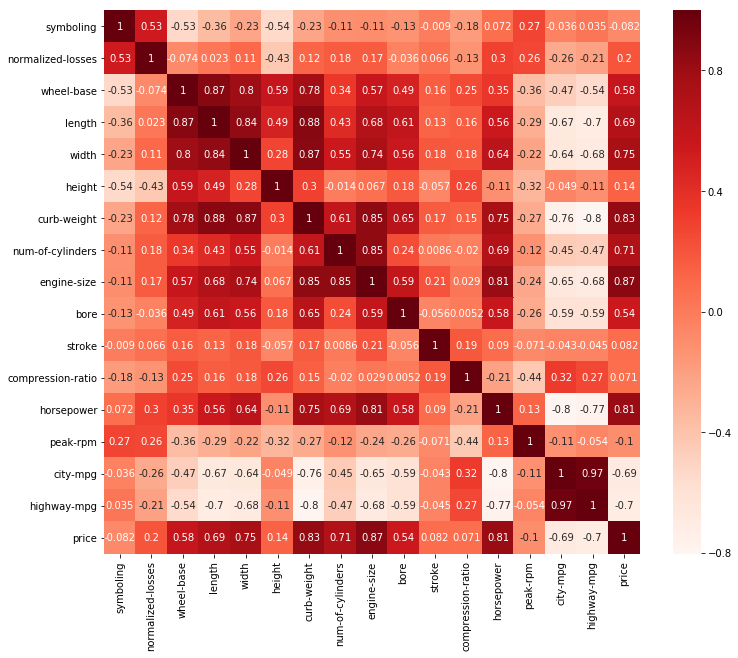

In [5]:
import numpy as np                 
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(123)

df_corr_health = ds.corr()['price'].sort_values(ascending=False).head(26)

top_corr_features = df_corr_health.index# plot top 20 most correlated features to our target (HEALTH)
df_corr_health.plot(kind='barh')
#plt.show()        # export selected features to .csv
#df_corr_health.to_csv('feature_selection_CORRELATION.csv')print(df_corr_health)
#print(df_corr_health)

plt.figure(figsize=(12,10))
cor = ds.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()

#print(X.columns)

cols = np.full((cor.shape[0],), True, dtype=bool)
print(cor.shape)

for i in range(cor.shape[0]):
    for j in range(i+1, cor.shape[0]):
        if cor.iloc[i,j] >= 0.9:
            if cols[j]:
                cols[j] = False

#selected_columns = X.columns[cols]
#data = X[selected_columns]

In [374]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

X_np = np.asarray(X)
#print(X_np)

X_1 = sm.add_constant(X_encoded)#Fitting sm.OLS model
model = sm.OLS(y, X_1).fit()
model.pvalues


const    1.808306e-02
x1       6.765310e-03
x2       5.606766e-02
x3       7.622705e-01
x4       2.967724e-02
x5       7.910233e-04
x6       1.930245e-02
x7       2.482251e-02
x8       3.234804e-02
x9       7.612119e-01
x10      1.574101e-01
x11      2.155819e-02
x12      9.137603e-03
x13      3.319973e-02
x14      6.245313e-02
x15      7.487635e-04
x16      7.499482e-01
x17      1.291511e-05
x18      5.632577e-01
x19      3.492843e-09
x20      7.905708e-02
x21      7.800089e-01
x22      6.663950e-01
x23      1.820457e-01
x24      2.296341e-04
x25      7.593314e-02
x26      8.020301e-01
x27      1.284756e-01
x28      6.197510e-01
x29      3.940394e-01
             ...     
x40      3.989214e-01
x41      3.805857e-09
x42      1.085268e-01
x43      5.938931e-04
x44      9.980158e-01
x45      2.358203e-01
x46      7.779521e-01
x47      3.708942e-01
x48      1.440079e-02
x49      9.581599e-01
x50      8.711001e-05
x51      2.792485e-02
x52      3.631351e-03
x53      4.034229e-04
x54      1